<a href="https://colab.research.google.com/github/monsieurpapa/DRCInternet/blob/main/Drc_open_internet_measurement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Large-scale Open Internet Measurement with M-Lab : Case of DRC

**Author:** Dieudonne Munganga 

**Date:** October 8th, 2022

This notebook is inspired by example queries on Open Internet Measurement by Phillipa Gill at SIGCOMM 2022. Tutorial : The Large-scale Open Internet Measurement with M-Lab . 

**Getting started:** 

1.   Make a copy of this Colab notebook to edit and run queries/scripts. 
2.   Visit [this link](https://www.measurementlab.net/data/docs/bq/quickstart/) for quick-start instructions on getting access to the M-Lab data. 

**Additional M-Lab resources:**

*   [NDT data in BigQuery](https://www.measurementlab.net/tests/ndt/#ndt-data-in-bigquery)
*   [Traceroute data in BigQuery](https://www.measurementlab.net/tests/traceroute/#traceroute-data-in-bigquery)





# Imports/utilities

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

from datetime import datetime
from datetime import date
from datetime import timedelta

import warnings
warnings.filterwarnings('ignore')

# Example 1: Download tests from a Country Code or a city at a given time . "CD" for The Democratic Republic of Congo in this case

This example gets tests from clients in Baltimore Maryland.

Items to note in this example:


*   UUID - this is a unique identifier for this test, can be used to link this test to other meta data (eg., packet captures, traceroutes)
*   Geolocation data is from Maxmind IP geolocation
* Server Site includes the metro where the server is as well as an integer distinguishing multiple sites in the same location with different upstream connectivity (see Server ASNumber). Each site is comprised of 4 servers (mlab1, mlab2 ..), 3 production and 1 for testing. 
* [Schema info](https://console.cloud.google.com/bigquery?project=measurement-lab&p=measurement-lab&d=ndt&t=unified_downloads&page=table) in BigQuery


In [ ]:
query = '''
SELECT
  a.UUID,
  a.TestTime,
  a.MeanThroughputMbps,
  a.MinRTT,
  a.LossRate,
  client.Geo.city as ClientCity,
  client.Geo.Subdivision1Name as ClientRegion,
  client.Network.ASNumber as ClientASNumber,
  client.Network.ASName as ClientASName,
  server.Geo.City as ServerCity,
  server.Site as ServerSite,
  server.Machine as ServerMachine,
  server.Network.ASNumber as ServerASNumber,
  server.Network.ASName as ServerASName
FROM
  `measurement-lab.ndt.unified_downloads`
WHERE 
  date >= "2022-07-01" AND date <= "2022-10-01"
  AND client.Geo.CountryCode = "CD"
ORDER BY a.TestTime
'''

pd.read_gbq(query, project_id="measurement-lab")


,UUID,TestTime,MeanThroughputMbps,MinRTT,LossRate,ClientCity,ClientRegion,ClientASNumber,ClientASName,ServerCity,ServerSite,ServerMachine,ServerASNumber,ServerASName
0,ndt-db7jp_1652829936_000000000038CE8C,2022-07-01 12:22:56.116508+00:00,26.971125,206.762000,0.001843,Kinshasa,Kinshasa City,30844.0,Liquid Telecommunications Ltd,Dublin,dub01,mlab3,1213,HEAnet Limited
1,ndt-h8xq9_1652917321_00000000002545D6,2022-07-01 12:51:44.774621+00:00,13.113962,350.719000,0.052996,Lubumbashi,Haut-Katanga,37453.0,Vodacom Congo,Nairobi,nbo01,mlab3,36914,Kenya Education Network
2,ndt-db7jp_1652829936_000000000038DFFC,2022-07-01 13:22:47.360756+00:00,4.162471,207.563000,0.062596,Kinshasa,Kinshasa City,30844.0,Liquid Telecommunications Ltd,Dublin,dub01,mlab3,1213,HEAnet Limited
3,ndt-h8xq9_1652917321_0000000000258512,2022-07-01 18:12:41.251606+00:00,6.347677,0.205220,0.029054,Mbuji-Mayi,Kasaï-Oriental,327879.0,AJYWA TELECOM,Nairobi,nbo01,mlab3,36914,Kenya Education Network
4,ndt-4r75d_1653005782_0000000000252A9D,2022-07-01 19:40:04.015440+00:00,0.591494,0.129709,0.002938,Lubumbashi,Haut-Katanga,37020.0,CELTEL DRC,Nairobi,nbo01,mlab1,36914,Kenya Education Network
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,ndt-jlm47_1663606529_0000000000068569,2022-10-01 15:21:41.281329+00:00,47.394219,0.337660,0.000045,Kinshasa,Kinshasa City,30844.0,Liquid Telecommunications Ltd,Lagos,los02,mlab1,29465,MTN NIGERIA Communication limited
1161,ndt-6tqq4_1659667071_000000000038860E,2022-10-01 18:49:58.336765+00:00,34.578692,0.000605,0.002956,Kinshasa,Kinshasa City,13335.0,"Cloudflare, Inc.",Johannesburg,jnb01,mlab2,2018,TENET (The UNINET Project)
1162,ndt-4vxwr_1663606638_0000000000095D27,2022-10-01 19:27:38.483137+00:00,1.900729,0.067000,0.052592,Kinshasa,Kinshasa City,43256.0,Global Broadband Solution societe de droit ame...,Lagos,los02,mlab3,29465,MTN NIGERIA Communication limited
1163,ndt-jlm47_1663606529_0000000000069D02,2022-10-01 19:28:29.381637+00:00,3.565238,0.067069,0.004044,Kinshasa,Kinshasa City,43256.0,Global Broadband Solution societe de droit ame...,Lagos,los02,mlab1,29465,MTN NIGERIA Communication limited


# Example 2: Download tests towards a given location

This query gets all tests towards the Nairobi (nbo) metro. Note that the M-Lab locate service directs users to the nearest server so this should get you clients relatively close to the server location. 

In [ ]:
query = '''
SELECT
  a.UUID,
  a.TestTime,
  a.MeanThroughputMbps,
  a.MinRTT,
  a.LossRate,
  client.Geo.city as ClientCity,
  client.Geo.Subdivision1Name as ClientRegion,
  client.Network.ASNumber as ClientASNumber,
  client.Network.ASName as ClientASName,
  server.Geo.City as ServerCity,
  server.Site as ServerSite,
  server.Machine as ServerMachine,
  server.Network.ASNumber as ServerASNumber,
  server.Network.ASName as ServerASName
FROM
  `measurement-lab.ndt.unified_downloads`
WHERE 
  date >= "2022-07-01" AND date <= "2022-10-01"
  AND client.Geo.CountryCode = "CD"
ORDER BY a.TestTime
'''

df1 = pd.read_gbq(query, project_id="measurement-lab")

# Example 3: Compare performance to different ASes

This gets tests from clients in DRC towards any MLAB server. It compares performance from clients in multiple ASes in DRC towards different ASes that M-Lab connects to.

In [ ]:
query = '''
SELECT
  TIMESTAMP_TRUNC(a.TestTime,HOUR) as TestHour,
  server.Network.ASNumber as ServerASNumber,
  server.Site as ServerSite,
  APPROX_QUANTILES(a.MeanThroughputMbps, 100)[OFFSET(50)] AS MeanThroughputMbps_p50, 
  APPROX_QUANTILES(a.MeanThroughputMbps, 100)[OFFSET(95)] AS MeanThroughputMbps_p95, 
  APPROX_QUANTILES(a.MinRTT, 100)[OFFSET(50)] AS MinRTT_p50, 
  APPROX_QUANTILES(a.MinRTT, 100)[OFFSET(95)] AS MinRTT_p95, 
  APPROX_QUANTILES(a.LossRate, 100)[OFFSET(50)] AS LossRate_p50, 
  APPROX_QUANTILES(a.LossRate, 100)[OFFSET(95)] AS LossRate_p95, 
  COUNT(*) AS NumTests
FROM
  `measurement-lab.ndt.unified_downloads`
WHERE 
  date >= "2022-01-01" AND date <= "2022-10-01"
  AND client.Geo.CountryCode = "CD"
  AND a.CongestionControl = 'bbr' ##Get NDT7 measurements
GROUP BY 1, 2, 3
ORDER BY 1
'''

df = pd.read_gbq(query, project_id="measurement-lab")
df = df[df.NumTests >= 2] ## filter for time bins with at least 10 tests

serverAS = df.ServerASNumber.unique() ## get the set of server ASes 


## Throughput over time 

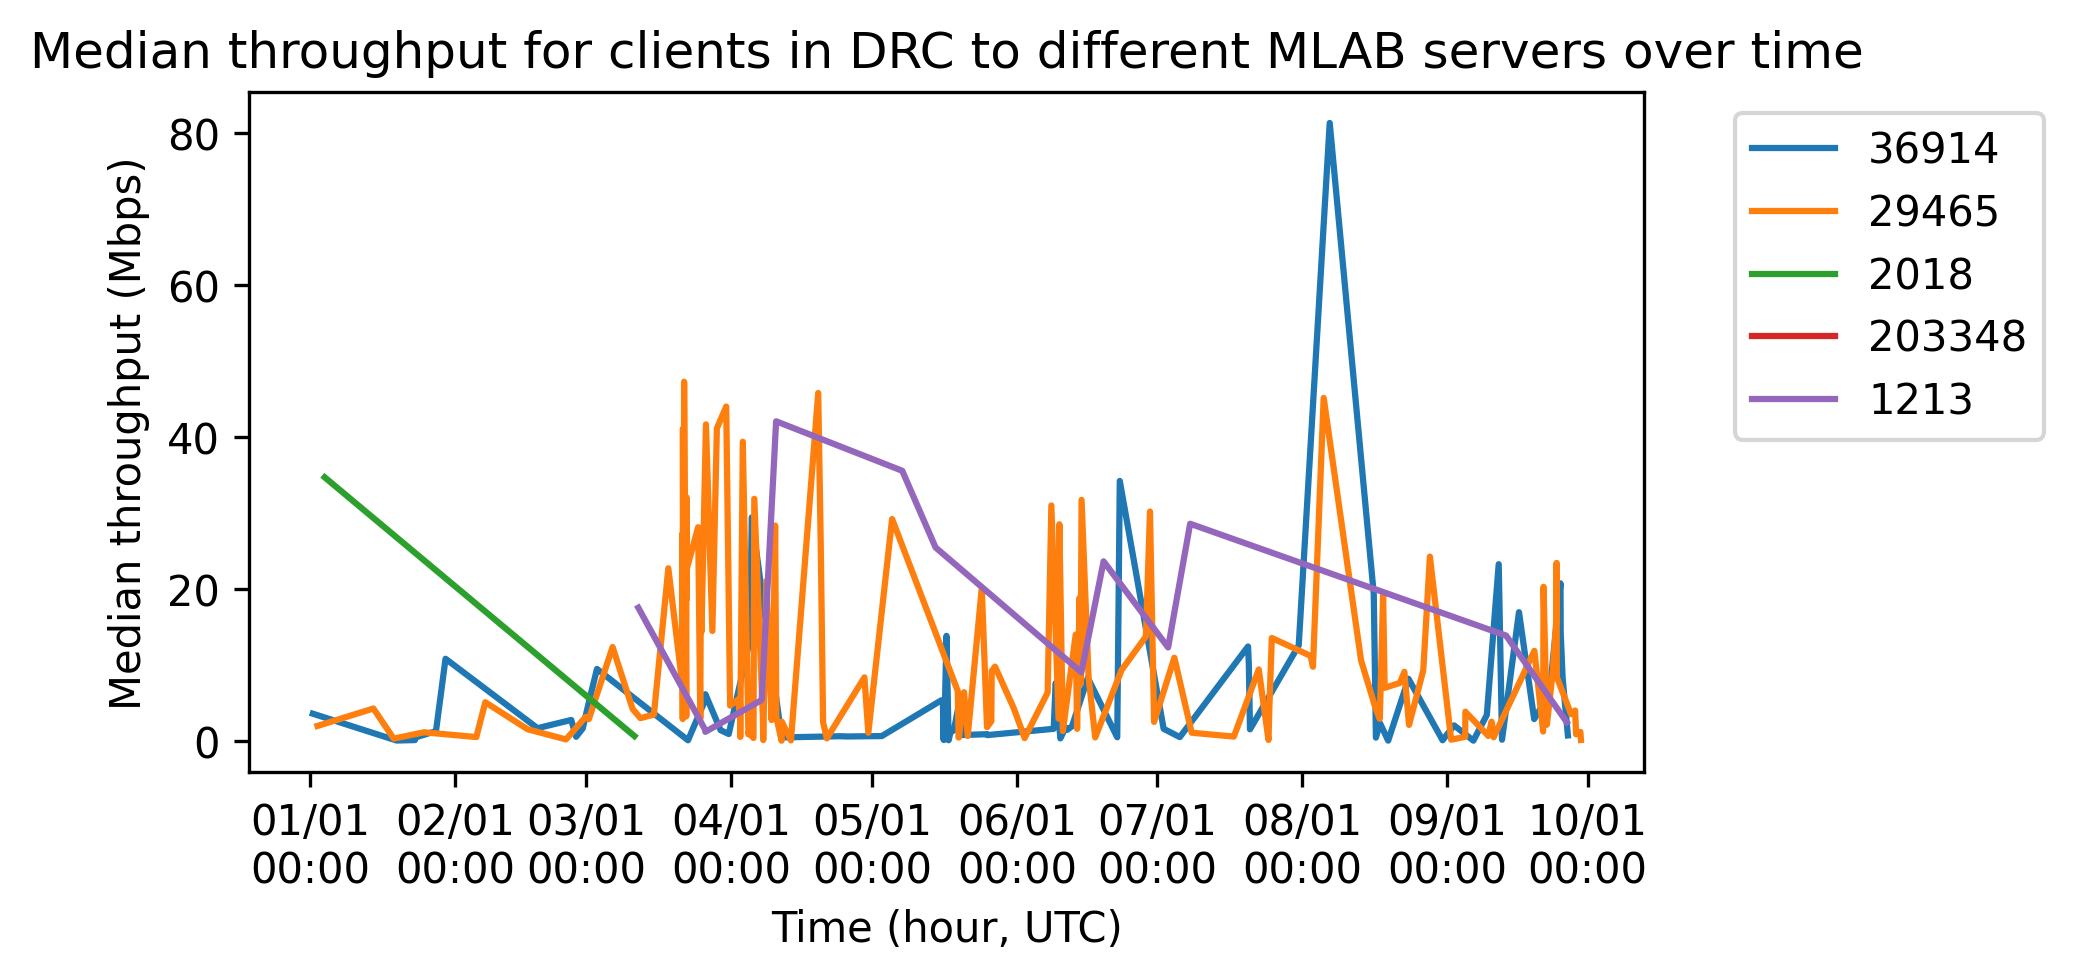

In [ ]:

fig, ax = plt.subplots(dpi=300,figsize=(6, 3))

for s in serverAS:
  tmp = df[df.ServerASNumber == s].sort_values(by='TestHour')
  ax.plot(tmp.TestHour, tmp.MeanThroughputMbps_p50, label=f"{s}")

ax.set_xlabel('Time (hour, UTC)')
ax.set_ylabel("Median throughput (Mbps)")
ax.xaxis.set_major_formatter(
      mdates.DateFormatter('%m/%d\n%H:%M'))
ax.set_title("Median throughput for clients in DRC to different MLAB servers over time")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


## MinRTT over time

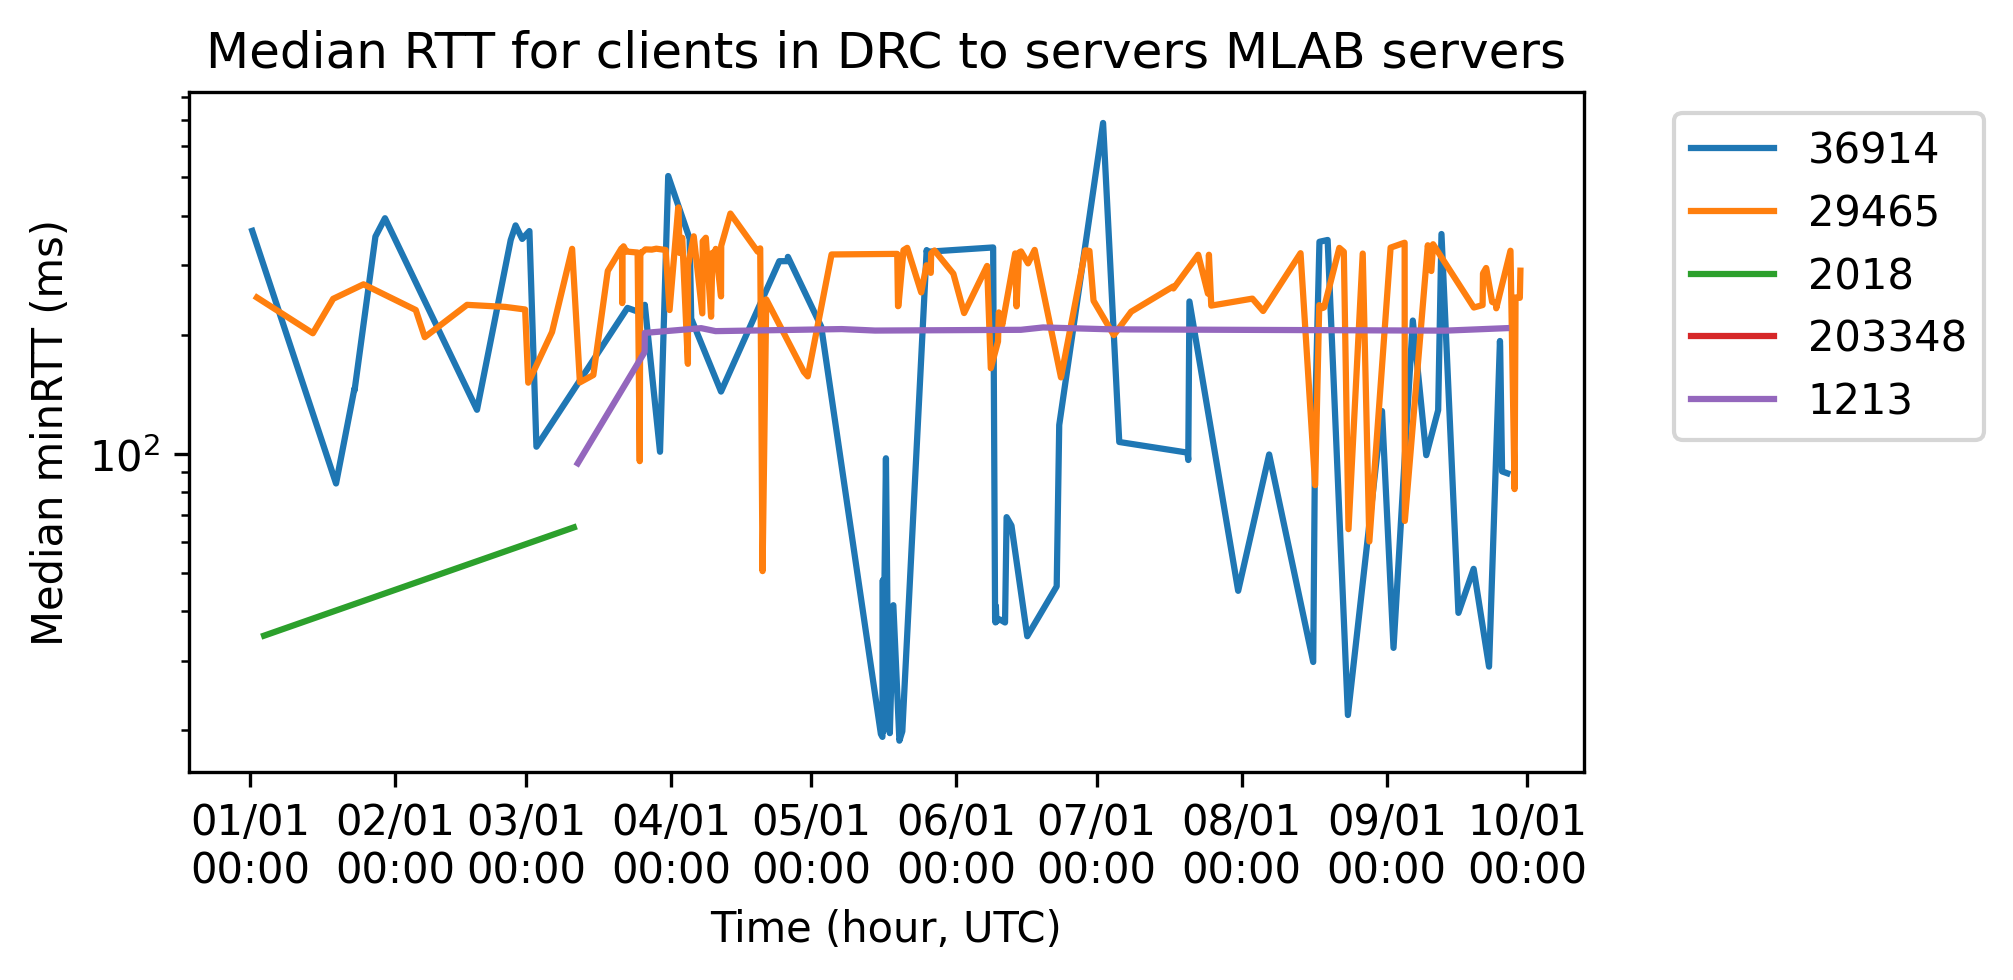

In [ ]:
fig, ax = plt.subplots(dpi=300,figsize=(6, 3))

for s in serverAS:
  tmp = df[df.ServerASNumber == s].sort_values(by='TestHour')
  ax.plot(tmp.TestHour, tmp.MinRTT_p50, label=f"{s}")

ax.set_xlabel('Time (hour, UTC)')
ax.set_ylabel("Median minRTT (ms)")
ax.xaxis.set_major_formatter(
      mdates.DateFormatter('%m/%d\n%H:%M'))
ax.set_yscale('log')
ax.set_title("Median RTT for clients in DRC to servers MLAB servers")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


## Exercise: Compare performance for different client ASes

Try comparing performance from different client ASes to different server ASes

# Example 4: Uploads vs. Downloads

This example compares upload and download performance from clients in DRC towards networks M-Lab connects with in nairobi.

In [ ]:
## Example query for clients in DRC and servers in Nairobi or Lagos 

query = '''
WITH downloads AS (
  SELECT
    TIMESTAMP_TRUNC(a.TestTime,HOUR) as TestHour,
    server.Network.ASNumber as ServerASNumber,
    server.Site as ServerSite,
    APPROX_QUANTILES(a.MeanThroughputMbps, 100)[OFFSET(50)] AS Download_MeanThroughputMbps_p50, 
    APPROX_QUANTILES(a.MeanThroughputMbps, 100)[OFFSET(95)] AS Download_MeanThroughputMbps_p95, 
    APPROX_QUANTILES(a.MinRTT, 100)[OFFSET(50)] AS Download_MinRTT_p50, 
    APPROX_QUANTILES(a.MinRTT, 100)[OFFSET(95)] AS Download_MinRTT_p95, 
    APPROX_QUANTILES(a.LossRate, 100)[OFFSET(50)] AS Download_LossRate_p50, 
    APPROX_QUANTILES(a.LossRate, 100)[OFFSET(95)] AS Download_LossRate_p95, 
    count(*) as Download_NumTests
  FROM
    `measurement-lab.ndt.unified_downloads`
  WHERE 
    date >= "2022-07-01" AND date <= "2022-10-01"
    AND client.Geo.CountryCode = "CD"
    AND server.Site like 'nbo%'
    AND a.CongestionControl = 'bbr' ##Get NDT7 measurements
  GROUP BY 1,2,3
    ),
    uploads AS (
  SELECT
    TIMESTAMP_TRUNC(a.TestTime,Hour) as TestHour,
    server.Network.ASNumber as ServerASNumber,
    server.Site as ServerSite,
    APPROX_QUANTILES(a.MeanThroughputMbps, 100)[OFFSET(50)] AS Upload_MeanThroughputMbps_p50, 
    APPROX_QUANTILES(a.MeanThroughputMbps, 100)[OFFSET(95)] AS Upload_MeanThroughputMbps_p95, 
    APPROX_QUANTILES(a.MinRTT, 100)[OFFSET(50)] AS Upload_MinRTT_p50, 
    APPROX_QUANTILES(a.MinRTT, 100)[OFFSET(95)] AS Upload_MinRTT_p95, 
    APPROX_QUANTILES(a.LossRate, 100)[OFFSET(50)] AS Upload_LossRate_p50, 
    APPROX_QUANTILES(a.LossRate, 100)[OFFSET(95)] AS Upload_LossRate_p95, 
    count(*) as Upload_NumTests
  FROM
    `measurement-lab.ndt.unified_uploads`
  WHERE 
    date >= "2022-07-01" AND date <= "2022-10-01"
    AND client.Geo.CountryCode = "CD"
    AND server.Site like 'nbo%'
    ##note that we cannot select on congestion control for uploads b/c we do not 
    ##have a way to know what congestion control is running on the client machine
  GROUP BY 1,2,3
    )
    SELECT * 
    FROM downloads 
    INNER JOIN uploads 
    USING (TestHour, ServerASNumber, ServerSite)
'''

df = pd.read_gbq(query, project_id="measurement-lab")


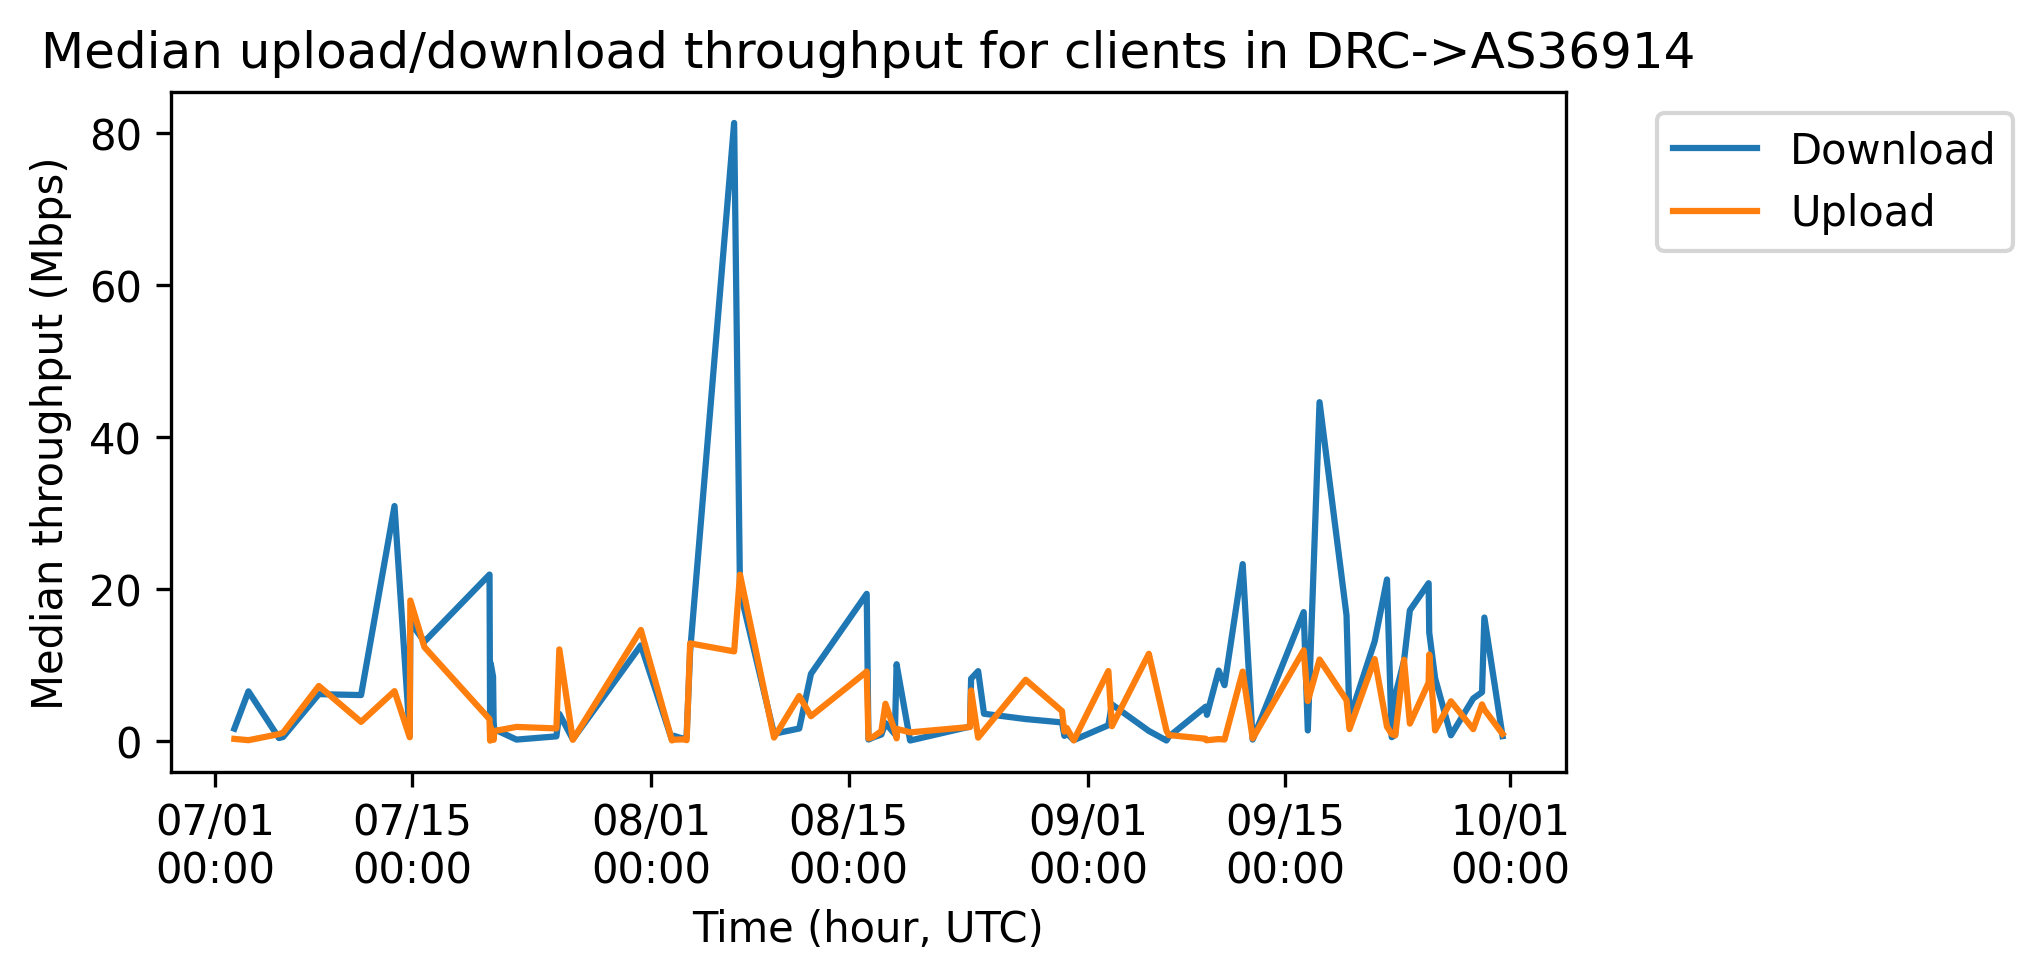

In [ ]:
serverAS = df.ServerASNumber.unique()
for s in serverAS:
  fig, ax = plt.subplots(dpi=300,figsize=(6, 3))
  tmp = df[df.ServerASNumber == s].sort_values(by='TestHour')
  ax.plot(tmp.TestHour, tmp.Download_MeanThroughputMbps_p50, label=f"Download")
  ax.plot(tmp.TestHour, tmp.Upload_MeanThroughputMbps_p50, label=f"Upload")

  ax.set_xlabel('Time (hour, UTC)')
  ax.set_ylabel("Median throughput (Mbps)")
  ax.xaxis.set_major_formatter(
        mdates.DateFormatter('%m/%d\n%H:%M'))
  ax.set_title(f"Median upload/download throughput for clients in DRC->AS{s}")
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
#Median Upload and Download speeds for top 3 ASNs in DRC

In [ ]:
## Example query for clients in DRC and servers in Nairobi or Lagos 

query = '''
WITH downloads AS (
  SELECT
    TIMESTAMP_TRUNC(a.TestTime,HOUR) as TestHour,
    client.Network.ASNumber as ClientASNumber,
    server.Site as ServerSite,
    APPROX_QUANTILES(a.MeanThroughputMbps, 100)[OFFSET(50)] AS Download_MeanThroughputMbps_p50, 
    APPROX_QUANTILES(a.MeanThroughputMbps, 100)[OFFSET(95)] AS Download_MeanThroughputMbps_p95, 
    APPROX_QUANTILES(a.MinRTT, 100)[OFFSET(50)] AS Download_MinRTT_p50, 
    APPROX_QUANTILES(a.MinRTT, 100)[OFFSET(95)] AS Download_MinRTT_p95, 
    APPROX_QUANTILES(a.LossRate, 100)[OFFSET(50)] AS Download_LossRate_p50, 
    APPROX_QUANTILES(a.LossRate, 100)[OFFSET(95)] AS Download_LossRate_p95, 
    count(*) as Download_NumTests
  FROM
    `measurement-lab.ndt.unified_downloads`
  WHERE 
    date >= "2022-01-01" AND date <= "2022-10-01"
    AND client.Geo.CountryCode = "CD"
    AND server.Site like 'nbo%'
    AND a.CongestionControl = 'bbr' ##Get NDT7 measurements
  GROUP BY 1,2,3
    ),
    uploads AS (
  SELECT
    TIMESTAMP_TRUNC(a.TestTime,Hour) as TestHour,
    client.Network.ASNumber as ClientASNumber,
    server.Site as ServerSite,
    APPROX_QUANTILES(a.MeanThroughputMbps, 100)[OFFSET(50)] AS Upload_MeanThroughputMbps_p50, 
    APPROX_QUANTILES(a.MeanThroughputMbps, 100)[OFFSET(95)] AS Upload_MeanThroughputMbps_p95, 
    APPROX_QUANTILES(a.MinRTT, 100)[OFFSET(50)] AS Upload_MinRTT_p50, 
    APPROX_QUANTILES(a.MinRTT, 100)[OFFSET(95)] AS Upload_MinRTT_p95, 
    APPROX_QUANTILES(a.LossRate, 100)[OFFSET(50)] AS Upload_LossRate_p50, 
    APPROX_QUANTILES(a.LossRate, 100)[OFFSET(95)] AS Upload_LossRate_p95, 
    count(*) as Upload_NumTests
  FROM
    `measurement-lab.ndt.unified_uploads`
  WHERE 
    date >= "2022-01-01" AND date <= "2022-10-01"
    AND client.Geo.CountryCode = "CD"
    AND server.Site like 'nbo%'
    ##note that we cannot select on congestion control for uploads b/c we do not 
    ##have a way to know what congestion control is running on the client machine
  GROUP BY 1,2,3
    )
    SELECT * 
    FROM downloads 
    INNER JOIN uploads 
    USING (TestHour, ClientASNumber, ServerSite)
'''

df = pd.read_gbq(query, project_id="measurement-lab")


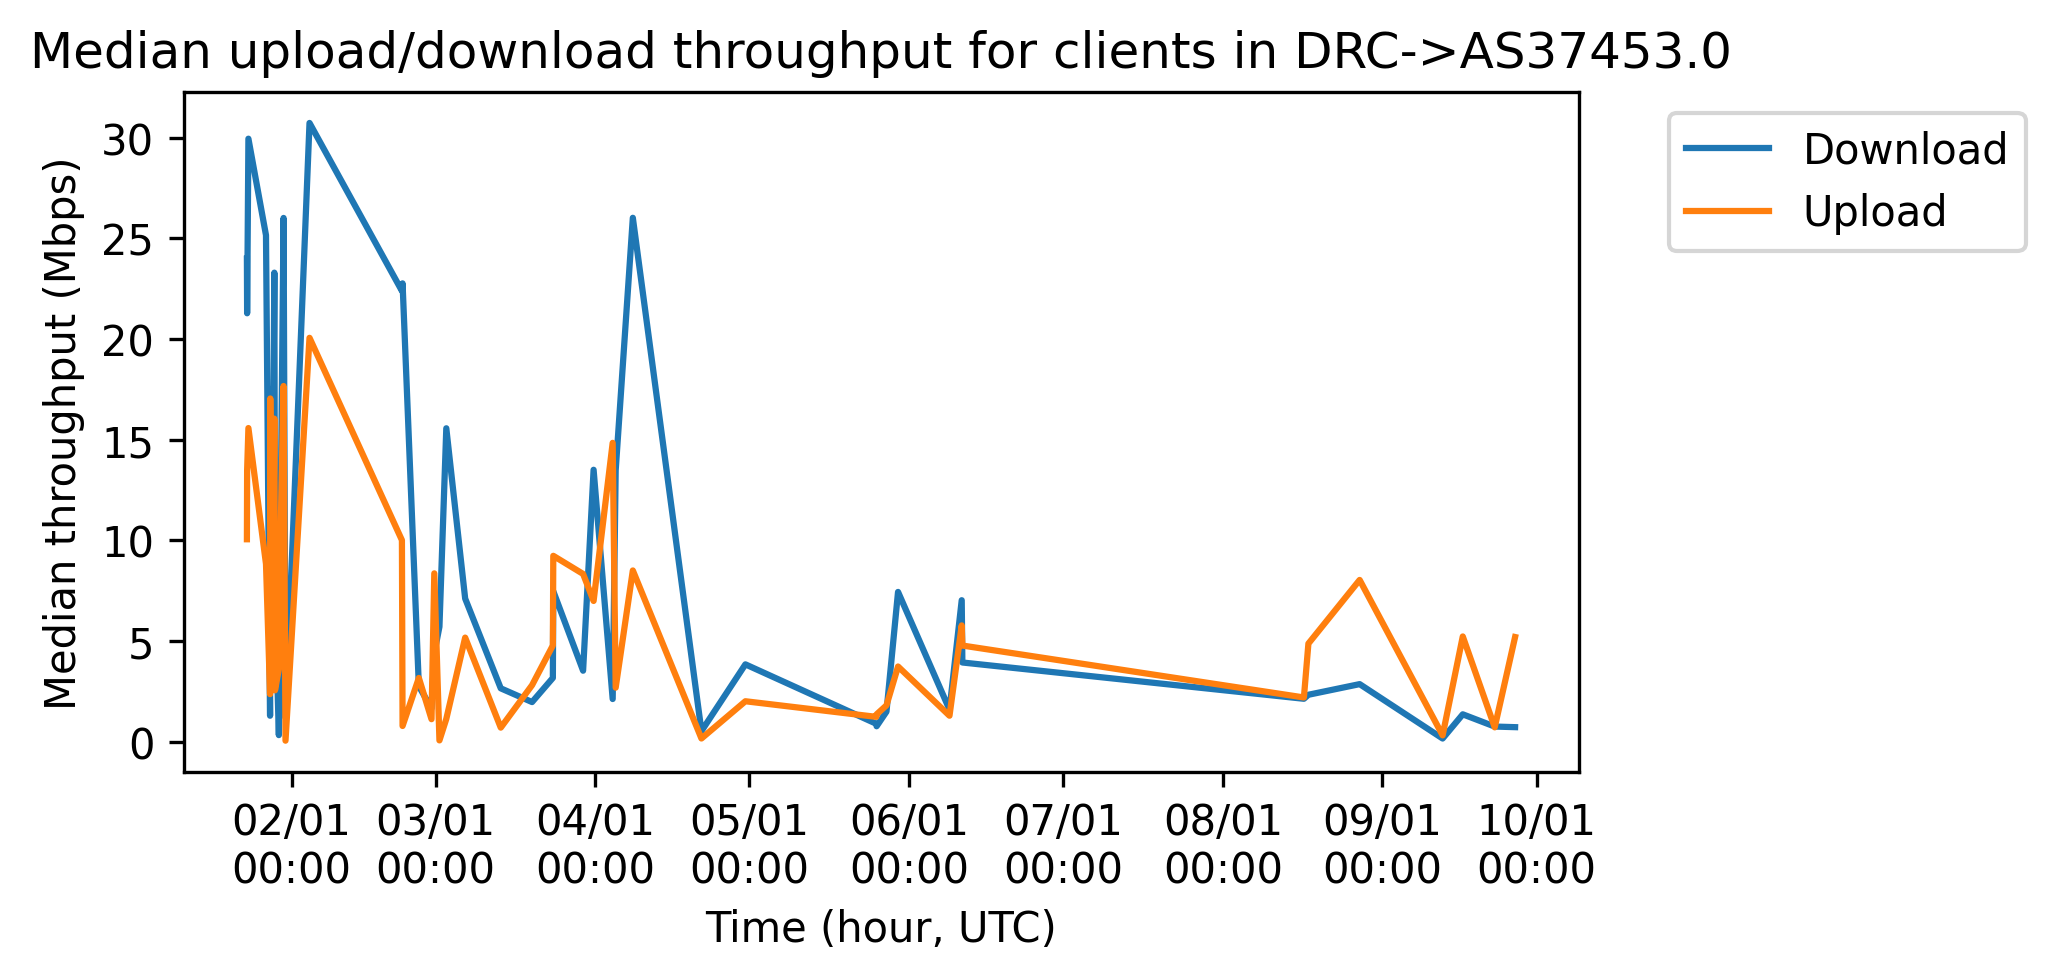

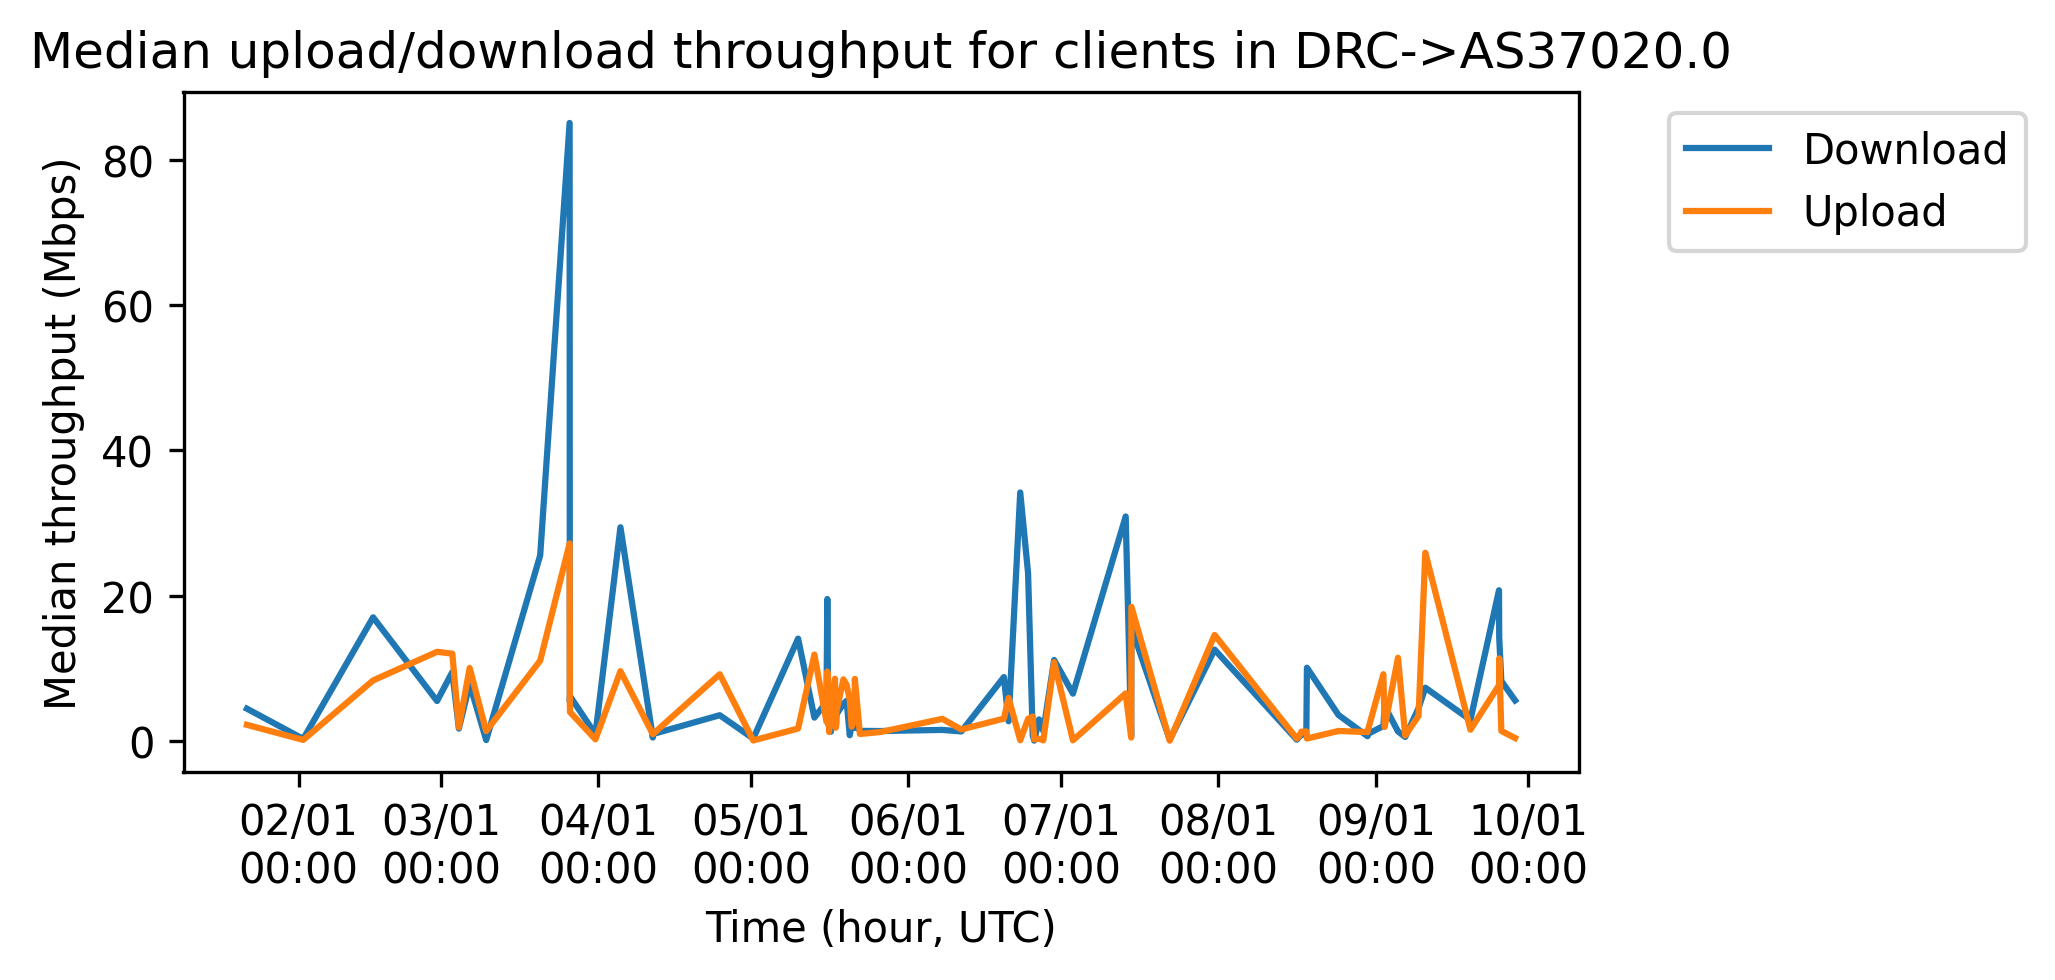

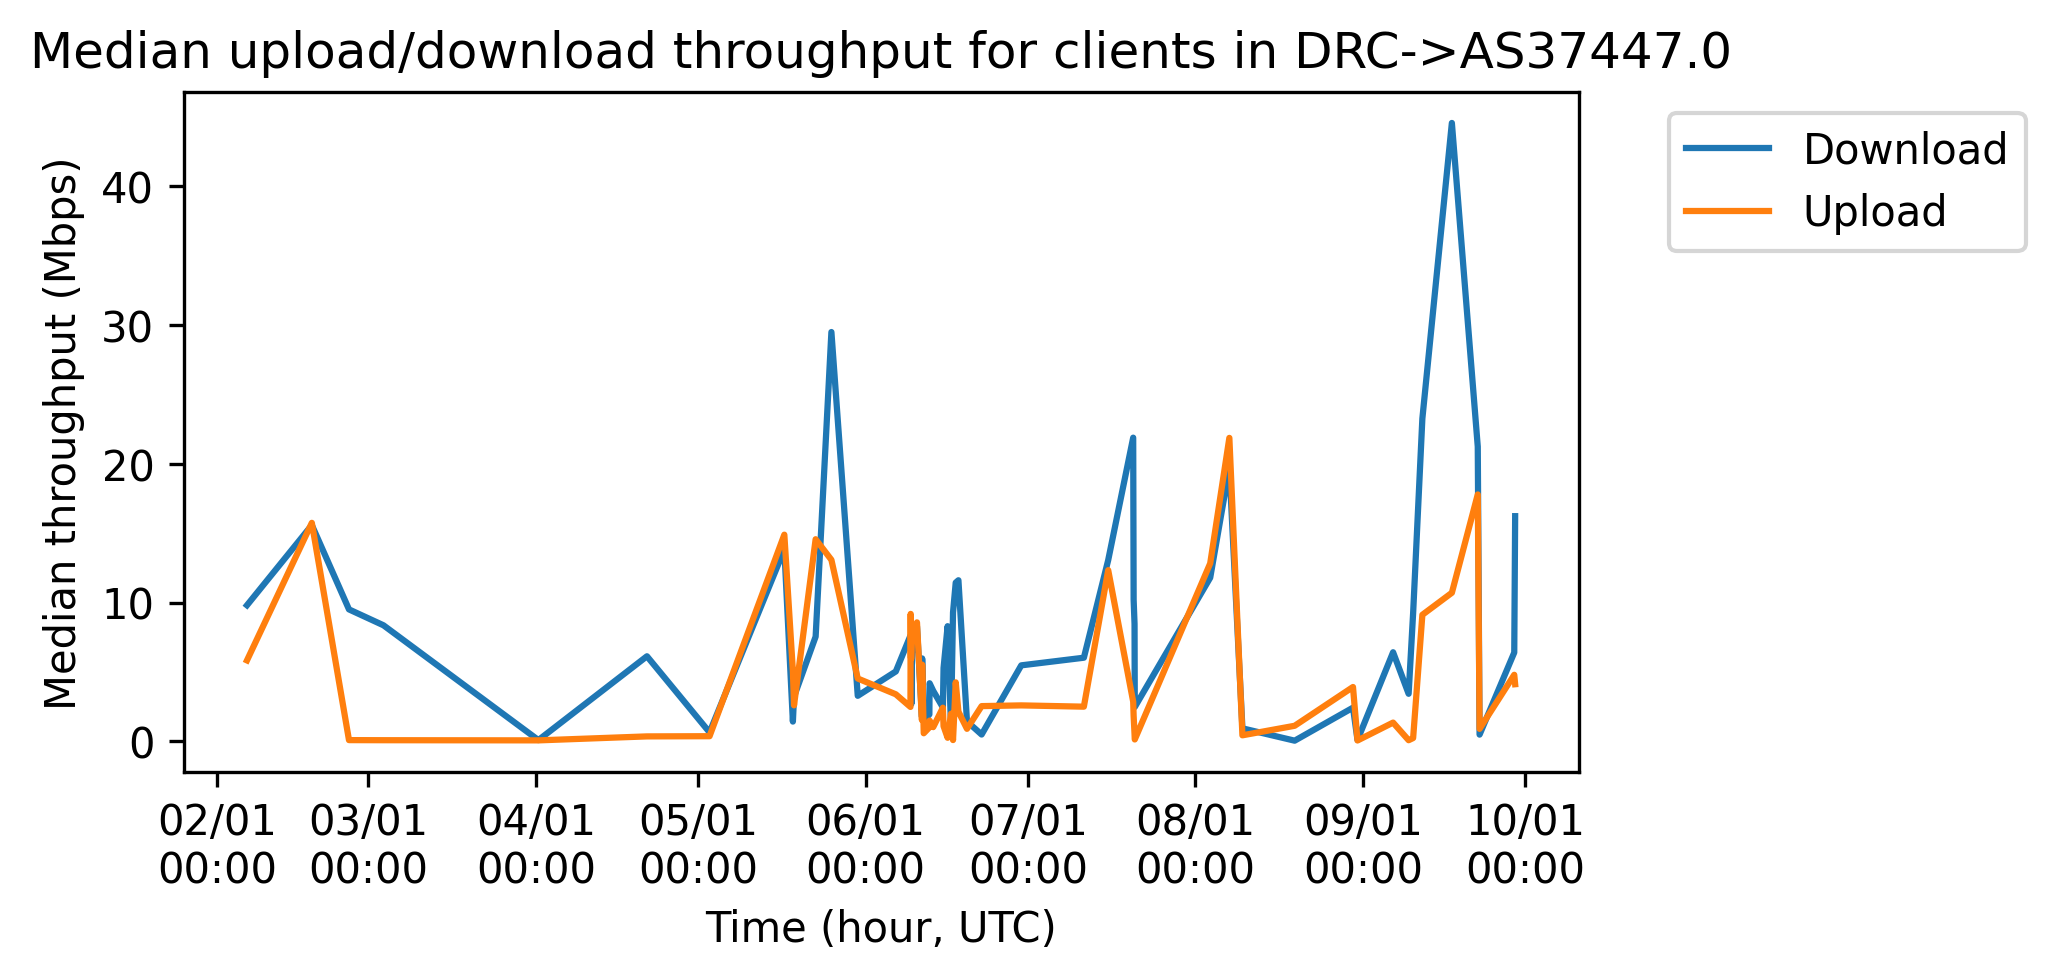

In [ ]:
clientAS = df1.ClientASNumber.unique()
interests = [37020, 37447,37453]
for s in clientAS:
  if s in interests:
    fig, ax = plt.subplots(dpi=300,figsize=(6, 3))
    tmp = df[df.ClientASNumber == s].sort_values(by='TestHour')
    ax.plot(tmp.TestHour, tmp.Download_MeanThroughputMbps_p50, label=f"Download")
    ax.plot(tmp.TestHour, tmp.Upload_MeanThroughputMbps_p50, label=f"Upload")

    ax.set_xlabel('Time (hour, UTC)')
    ax.set_ylabel("Median throughput (Mbps)")
    ax.xaxis.set_major_formatter(
          mdates.DateFormatter('%m/%d\n%H:%M'))
    ax.set_title(f"Median upload/download throughput for clients in DRC->AS{s}")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Example 5 Amount of NDT tests

## Example 5.1 NDT tests per day

In [ ]:
query = '''
SELECT
  TIMESTAMP_TRUNC(a.TestTime,DAY) as TestDay,
  a.CongestionControl,
  COUNT(*) AS NumTests
FROM
  `measurement-lab.ndt.unified_downloads`
WHERE 
  date >= "2022-01-01" AND date <= "2022-10-01"
  AND a.TestTime >= "2022-01-01" AND a.TestTime <= "2022-10-01"
  AND client.Geo.CountryCode = "CD"
  
GROUP BY 1, 2
ORDER BY 1
'''

df = pd.read_gbq(query, project_id="measurement-lab")


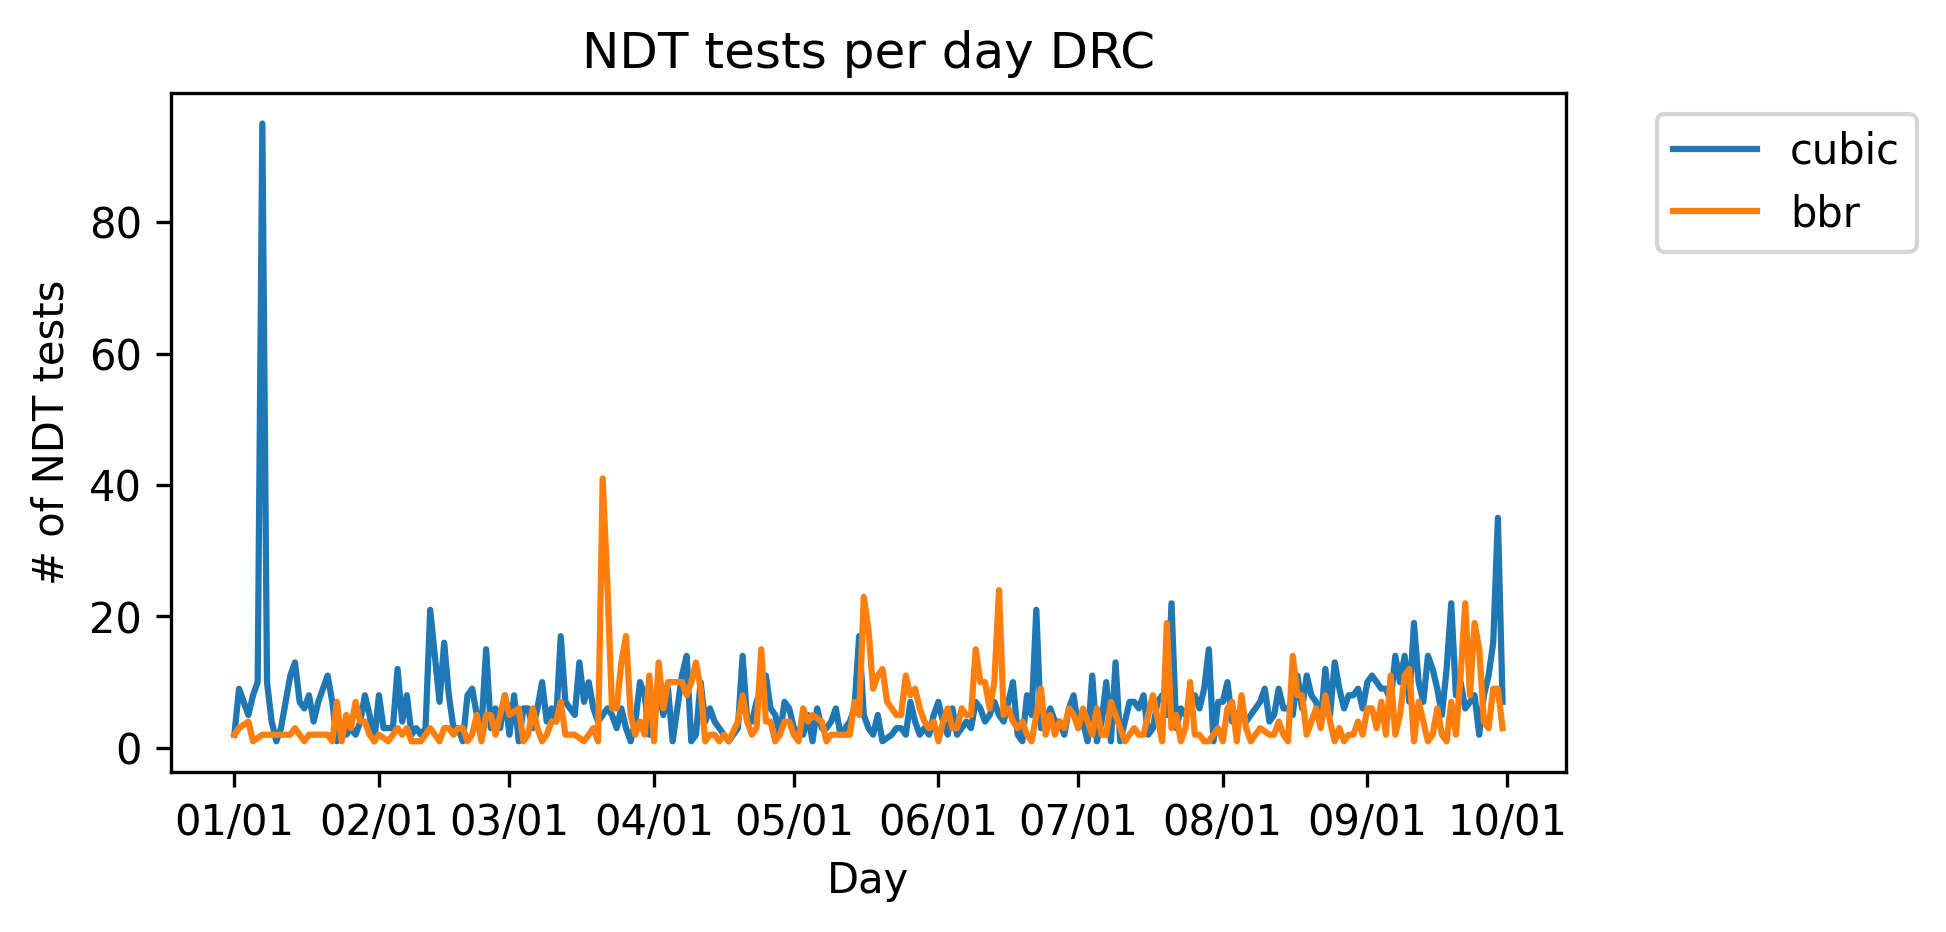

In [ ]:
fig, ax = plt.subplots(dpi=300,figsize=(6, 3))

df = df.sort_values(by='TestDay')

ax.plot(df.TestDay[df.CongestionControl=='cubic'], df.NumTests[df.CongestionControl=='cubic'], label="cubic")
ax.plot(df.TestDay[df.CongestionControl=='bbr'], df.NumTests[df.CongestionControl=='bbr'], label="bbr")

ax.set_title("NDT tests per day DRC")
ax.set_xlabel('Day')
ax.set_ylabel("# of NDT tests")
ax.xaxis.set_major_formatter(
      mdates.DateFormatter('%m/%d'))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

## Example 5.2 Tests per minute during Facebook outage

In [ ]:
query = '''
SELECT
  TIMESTAMP_TRUNC(a.TestTime,Minute) as TestMinute,
  COUNT(*) AS NumTests
FROM
  `measurement-lab.ndt.unified_downloads`
WHERE 
  date >= "2021-10-04" AND date <= "2021-10-05"
  AND a.TestTime >= "2021-10-04" AND a.TestTime <= "2021-10-05"
GROUP BY 1
ORDER BY 1
'''

df = pd.read_gbq(query, project_id="measurement-lab")


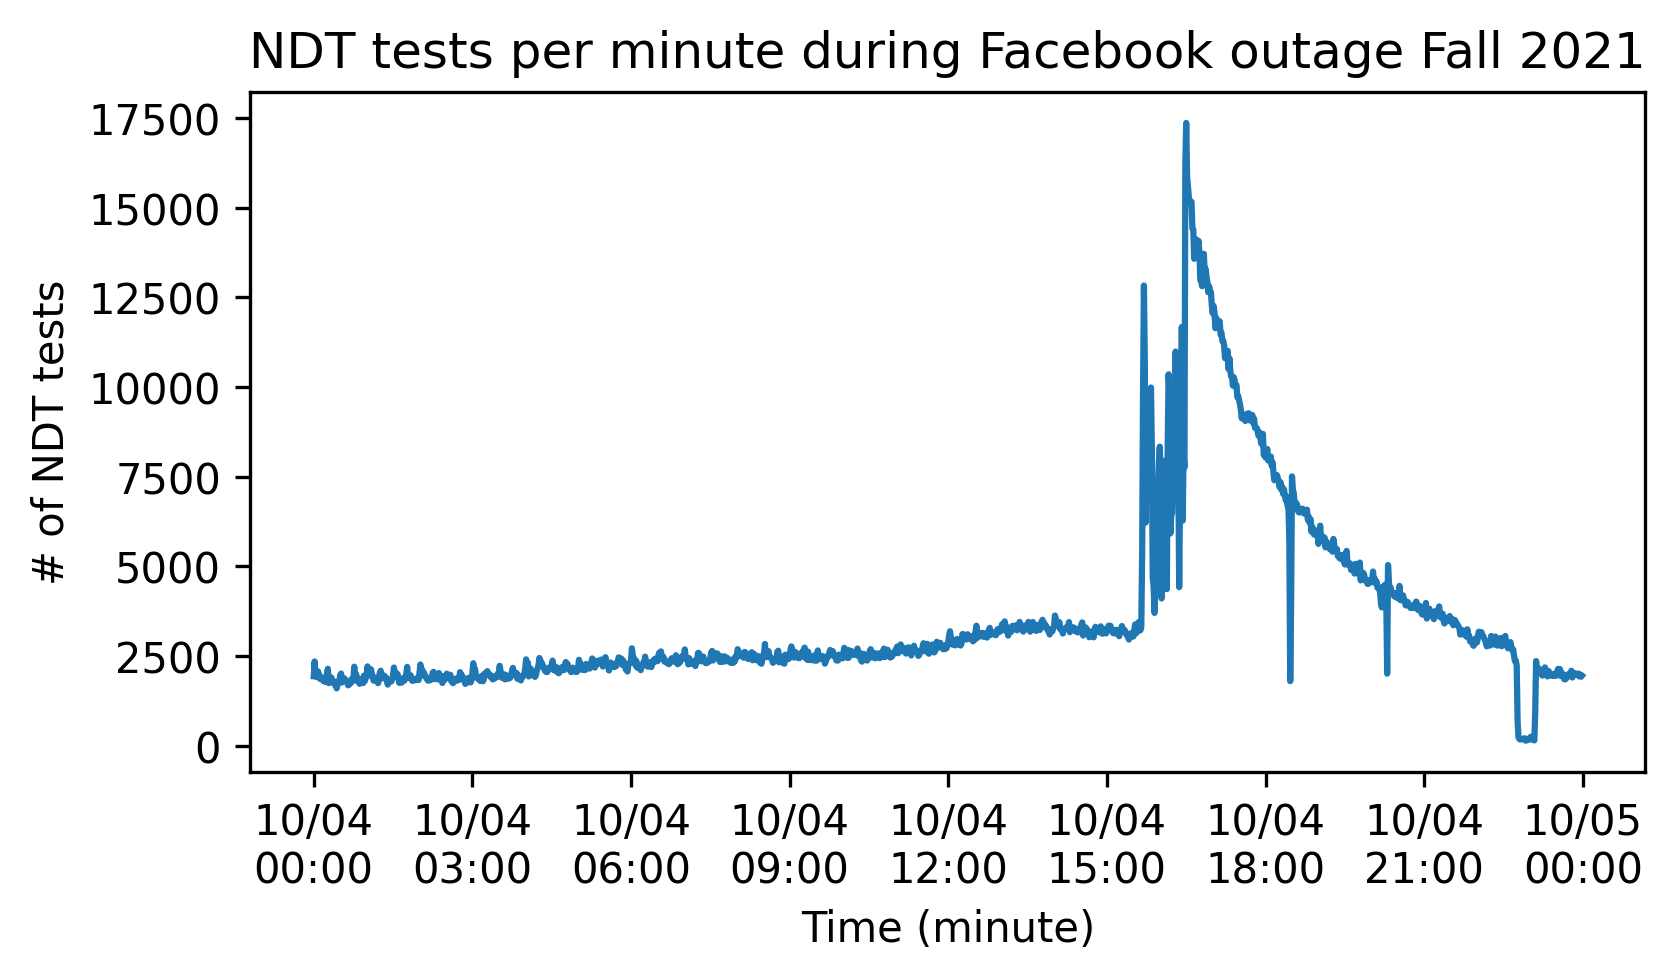

In [ ]:
fig, ax = plt.subplots(dpi=300,figsize=(6, 3))

df = df.sort_values(by='TestMinute')

ax.plot(df.TestMinute, df.NumTests)
ax.set_title("NDT tests per minute during Facebook outage Fall 2021")
ax.set_xlabel('Time (minute)')
ax.set_ylabel("# of NDT tests")
ax.xaxis.set_major_formatter(
      mdates.DateFormatter('%m/%d\n%H:%M'))


# Example 6: Tests per client IP 

This example plots tests per IP for the first week of July 2022 globally. It plots the normalized rank of the client IPs vs. the cumulative sum of # of tests (ie., (x,y) tells you that X% of the client IPs contribute Y% of the tests).

In [ ]:
##***This query takes ~4 minutes for 1 week of data***

query = '''
SELECT
  Client.IP as clientIP,
  COUNT(*) AS NumTests
FROM
  `measurement-lab.ndt.unified_downloads`
WHERE 
  date >= "2022-07-01" AND date <= "2022-07-07"
GROUP BY 1
'''

df = pd.read_gbq(query, project_id="measurement-lab")


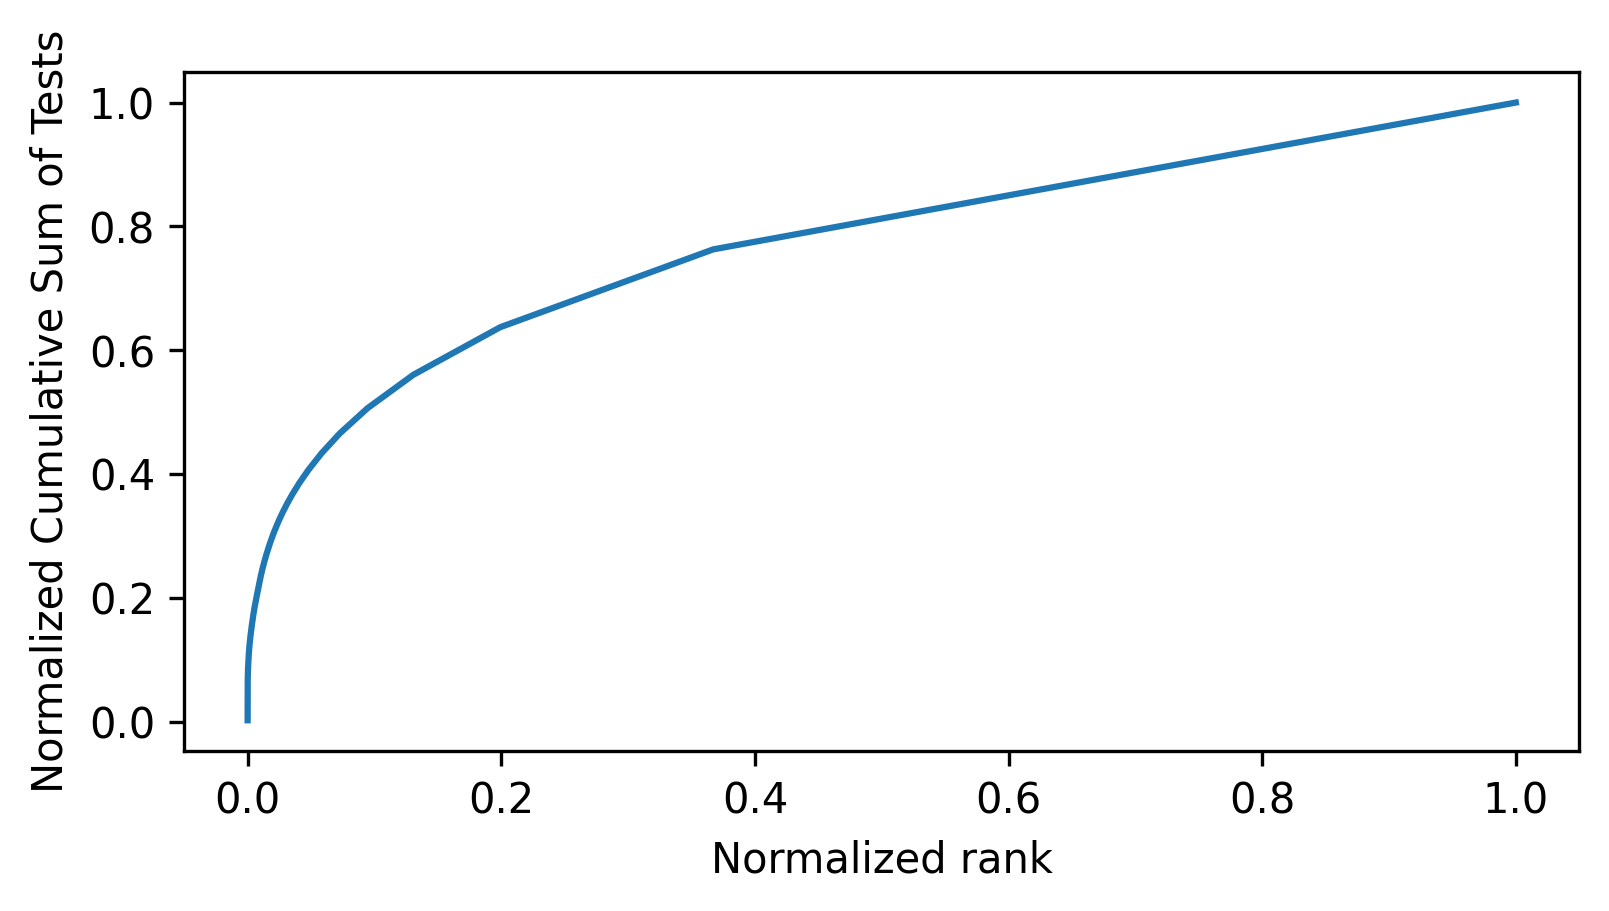

In [ ]:
df = df.sort_values(by="NumTests", ascending=False) #sort by # tests
df = df.reset_index().drop(columns={'index'}) #get rid of old index

## Get normalized rank and test counts 
df['NormRank'] = df.index/len(df)
df['NormCumTests'] = df['NumTests'].cumsum()/sum(df['NumTests'])

fig, ax = plt.subplots(dpi=300,figsize=(6, 3))

ax.plot(df.NormRank, df.NormCumTests)

ax.set_xlabel('Normalized rank')
ax.set_ylabel("Normalized Cumulative Sum of Tests")

print()

In [ ]:
df[df.NormRank <= 0.2].tail(1) ## Top 20% of client IPs contribute ~2/3 of the tests from July 1-7 

,clientIP,NumTests,NormRank,NormCumTests
1672262,187.190.28.104,2,0.2,0.637877


# Example 7: Access traceroute for a test 

Traceroute uses [scamper](https://conferences.sigcomm.org/imc/2010/papers/p239.pdf)'s multipath traceroute algorithm that varies the flow ID to explore multiple paths. The structure of the data in the scamper table reflects this. Documentation for traceroute [link](https://www.measurementlab.net/tests/traceroute/) .

## View the entire traceroute data 


In [ ]:
query = f'''
 SELECT 
      probes.TTL as TTL,
      flowid, 
      nodes.addr as node_addr,
      ha1.raw.Annotations.Network.ASNumber,
      ha1.raw.Annotations.Network.ASName
    FROM  measurement-lab.ndt_raw.scamper1 as s1,
        UNNEST(raw.Tracelb.nodes) AS nodes , 
        UNNEST(nodes.links) AS links_tmp,
        UNNEST(links_tmp.Links) AS links,
        UNNEST(links.Probes) AS probes
    LEFT JOIN measurement-lab.ndt_raw.hopannotation1 as ha1
      ON nodes.hop_id = ha1.id
    WHERE s1.id = 'ndt-z6xtt_1653056790_0000000000226DF3'
    ORDER by flowid, probes.TTL

'''

df = pd.read_gbq(query, project_id="measurement-lab")

df 

,TTL,flowid,node_addr,ASNumber,ASName
0,2,1,2001:668:1f:21::1,3257,GTT Communications Inc.
1,4,1,2001:668:0:2:ffff:0:5995:b532,3257,GTT Communications Inc.
2,6,1,2001:668:0:2:ffff:0:5995:b532,3257,GTT Communications Inc.
3,7,1,2001:558:2f0:65::2,7922,"Comcast Cable Communications, LLC"
4,8,1,2001:558:2f0:23a::2,7922,"Comcast Cable Communications, LLC"
5,9,1,2001:558:340:2021::2,7922,"Comcast Cable Communications, LLC"
6,10,1,2001:558:2f2:f1::2,7922,"Comcast Cable Communications, LLC"
7,2,2,2001:668:1f:21::1,3257,GTT Communications Inc.
8,3,2,2001:668:0:2:ffff:0:5995:b532,3257,GTT Communications Inc.
9,6,2,2001:668:0:2:ffff:0:5995:b532,3257,GTT Communications Inc.


## Get one traceroute path

In [ ]:
query = f'''
 SELECT 
      min(probes.TTL) as minTTL,
      nodes.addr as node_addr,
      ha1.raw.Annotations.Network.ASNumber,
      ha1.raw.Annotations.Network.ASName
    FROM  measurement-lab.ndt_raw.scamper1 as s1,
        UNNEST(raw.Tracelb.nodes) AS nodes , 
        UNNEST(nodes.links) AS links_tmp,
        UNNEST(links_tmp.Links) AS links,
        UNNEST(links.Probes) AS probes
    LEFT JOIN measurement-lab.ndt_raw.hopannotation1 as ha1
      ON nodes.hop_id = ha1.id
    WHERE s1.id = 'ndt-z6xtt_1653056790_0000000000226DF3'
    AND flowid = 1
    GROUP BY 2,3,4
    ORDER BY 1
    '''
df = pd.read_gbq(query, project_id="measurement-lab")

df 